# Lab 10 - Anomaly detection

## Anomaly detection

During this exercise we are going to implement an anomaly detection algorithm for server computers. The features measure the throughput (mb/s) and latency (ms) of response of each server.

Firstly, load the dataset ex8data1.mat

Using X.shape analyse the amount of data and features.

In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

data = loadmat('./ex8data1.mat')  
X = data["X"]

# TODO: amount of data
X.shape

(307, 2)

Visualise the dataset using scatter plot

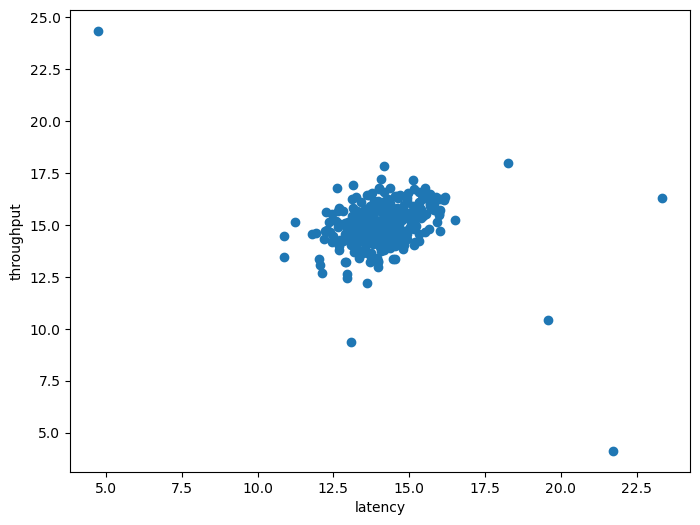

In [31]:
# TODO: visualise the dataset and look for anomalies
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1])
plt.xlabel('latency')
plt.ylabel('throughput')
plt.show()

Using plt.hist plot the histogram of the data and check wether it is necessary to scale it.

Text(0.5, 1.0, 'throughput (mb/s)')

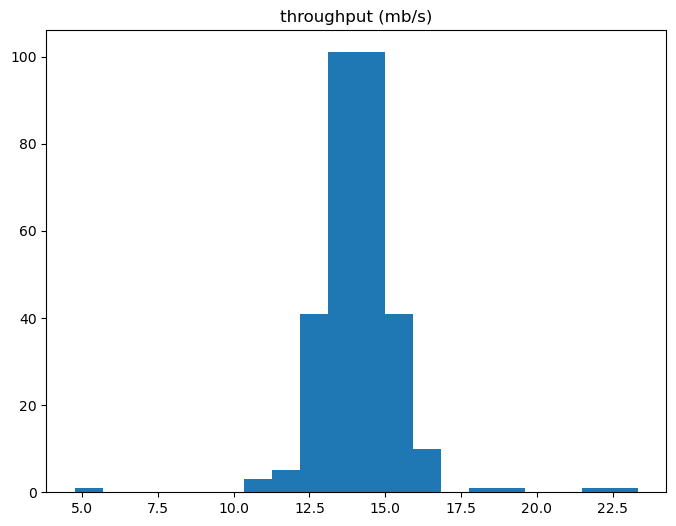

In [5]:
# TODO: plot the histogram for features: throughput (mb/s) and latency (ms).
plt.figure(figsize=(8,6))
plt.hist(X[:,0], bins = 20)
plt.title('throughput (mb/s)')

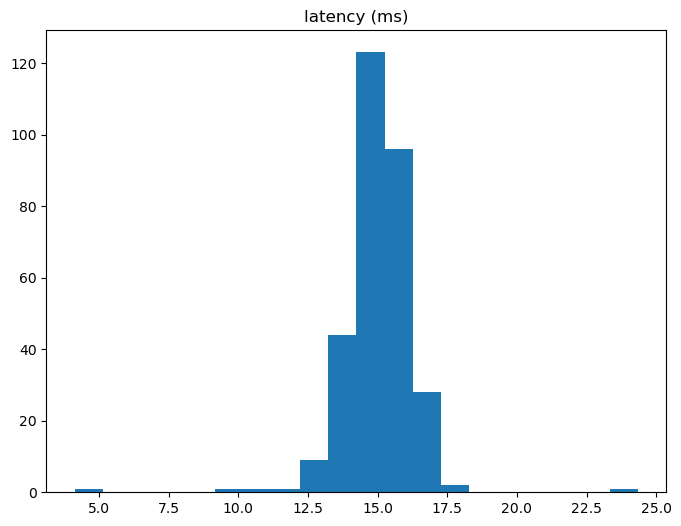

In [6]:
plt.figure(figsize=(8,6))
plt.hist(X[:,1], bins = 20)
plt.title('latency (ms)')
plt.show()

## Gaussian distribution

Now, you will estimate a Gaussian distribution for each feature in the data.

To accomplish this we'll create a simple function that calculates the mean and standard deviation for each feature in our data set:

In [18]:
def estimate_gaussian(X):  
# TODO: calculate mu and sigma
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    return mu, sigma
 
# TODO: run the function for your dataset
gauss = estimate_gaussian(X)
x1_mean = gauss[0][0]
x1_std = gauss[1][0]
x2_mean = gauss[0][1]
x2_std = gauss[1][1]
gauss

(array([14.11222578, 14.99771051]), array([1.35374717, 1.3075723 ]))

## Calculate probability

Now that we have our model parameters, we need to determine a probability threshold which indicates that an example should be considered an anomaly. 

To do this, we need to use a set of labeled validation data:

In [23]:
Xval = data["Xval"]
yval = data["yval"]

# TODO: check the number of data (X.shape)
Xval.shape

(307, 2)

Use the biult-in function stats.norm.pdf() (with parameters: loc as mean and scale as standard deviation) to calculate the probability that a data (firstly X not Xval) point belongs to a normal distribution (for both features). 

Calculate the probability that each of the first 50 instances of our data set's first dimension belong to the distribution:

In [24]:
from scipy import stats

# TODO: calculate the probability for X data
p = np.zeros((X.shape[0], X.shape[1]))
pval = np.zeros((Xval.shape[0], Xval.shape[1]))

You just calculated the probability that a data point belongs to a normal distribution that we defined earlier by calculating the mean and std for that dimension (feature 1 and 2). It's computing how far each instance is from the mean. 

Now, we also need to do this for the validation set (using the same model parameters). We'll use these probabilities combined with the true label to determine the optimal probability threshold to assign data points as anomalies.

In [25]:
pval = np.zeros((Xval.shape[0], Xval.shape[1]))

# TODO: calculate the probability for Xval data
p[:, 0] = stats.norm.pdf(X[:, 0], x1_mean, np.sqrt(x1_std))
p[:, 1] = stats.norm.pdf(X[:, 1], x2_mean, np.sqrt(x2_std))
pval[:, 0] = stats.norm.pdf(Xval[:, 0], x1_mean, np.sqrt(x1_std))
pval[:, 1] = stats.norm.pdf(Xval[:, 1], x2_mean, np.sqrt(x2_std))

## Selecting the threshold

The aim of this part is to implement a function that finds the best threshold value given the probability density values and true labels.

The function should return two values: selected threshold and F1 score (import f1_score from sklearn.metrics), which tells you how well you’re doing on finding the ground truth anomalies given a certain threshold.

Epsilon value should be iterated with a small step between 'p.min' and 'p.max' value (about 10000 steps). 

In [27]:
from sklearn.metrics import f1_score 

def select_threshold(pval, yval): 
# TODO: select the best epsilon based on the F1 score
    thresholds = np.linspace(pval.min(), pval.max(), 1000)
    best_f1 = 0

    for i in thresholds:
        ypred = (pval[:, 0] < i) | (pval[:, 1] < i)
        new = f1_score(yval, ypred.astype(int))
        if new > best_f1:
            best_f1 = new
            best_epsilon = i
    return best_epsilon, best_f1

best_epsilon, best_f1 = select_threshold(pval, yval)
best_epsilon, best_f1

(0.00034923001962944495, 0.8750000000000001)

## Anomaly detection result

Run your anomaly detection code and circle the anomalies in the plot:

In [60]:
t1 = p[:, 0] < best_epsilon
t2 = p[:, 1] < best_epsilon
y = np.logical_or(t1,t2).astype(int)
anomalies = np.where(y == 1)
print(anomalies, y)
AN = np.zeros((anomalies[0].shape[0], 2))
for i in range (0, anomalies[0].shape[0]):
    AN[i, 0] = X[anomalies[0][i], 0]
    AN[i, 1] = X[anomalies[0][i], 1]

(array([300, 301, 303, 304, 306]),) [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 1 1 0 1]


Text(0.5, 1.0, 'Final result')

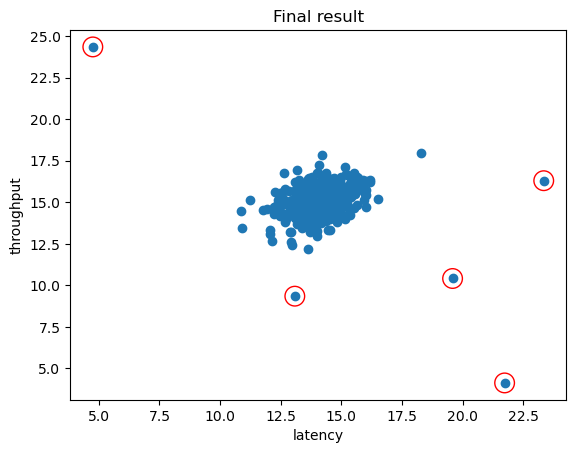

In [61]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(AN[:,0], AN[:,1], s=200, facecolors='none', edgecolors='r')
plt.xlabel('latency')
plt.ylabel('throughput')
plt.title('Final result')